## GRIP - The Spark Foundation 
### Computer Vision and Internet of Things
### Author :- Saurabh Surve
### Task 1 :- Object Detection/ Optical Character Recognition 
#### In this task we have to implement an object detector which identifies classes of the objects in an image or video.

### Importing Required Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt

### Loading our model

In [2]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

### Creating the class file

In [4]:
classLabels = []
file_name = 'Labels.txt'
with open(file_name, 'rt') as f:
    classLabels = f.read().rstrip('\n').split('\n')
    

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print("length of class labels :",len(classLabels))

length of class labels : 80


### Setting up the configuration of the model

In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 0000026D70EF97B0>

### Object  Detection in an image

In [8]:
img = cv2.imread("img1.jpeg")

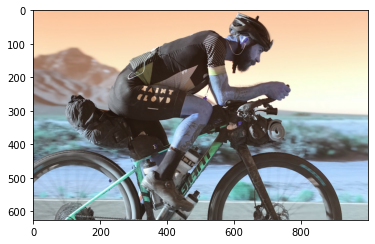

In [9]:
plt.imshow(img)
plt.show()

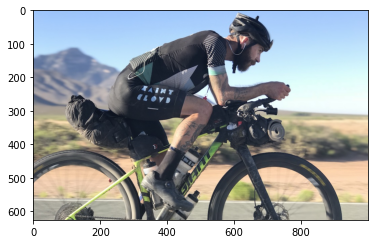

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [12]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd ,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale = font_scale,color=(0,255,0),thickness=3)

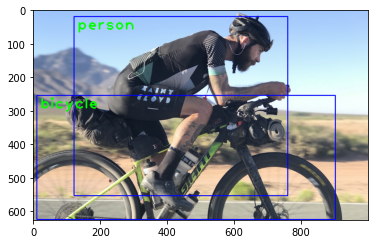

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

### Object Detection In Video

In [22]:
vid = cv2.VideoCapture(r"video.mp4")

#check if video is open currectly or not
if not vid.isOpened():
    vid = cv2.VideoCapture(0)
if not vid.isOpened():
    raise IOError("Can not open video.")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = vid.read()
    
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)

    if (len(ClassIndex)!= 0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if (ClassInd <= 80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font, fontScale=font_scale, color = (0,255,0),thickness = 3)
    cv2.imshow("Object Detection",frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break   
        
vid.release()
cv2.destroyAllWindows()
